# Hyperparameter Tuning Visualisation
This notebook is used to generate graphs, figures etc. needed from the various results obtained during the hyperparameter tuning process.

In [1]:
#import of relevant modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

C:\Users\Owner\AppData\Local\Temp\ipykernel_5564\1335182444.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


[ 3382.97063555  4989.44028285  3633.28865865  -860.9957141
   765.28349895  4757.60469495 -1274.5818879   1839.62322485
  -446.0880663   5986.2724273 ]


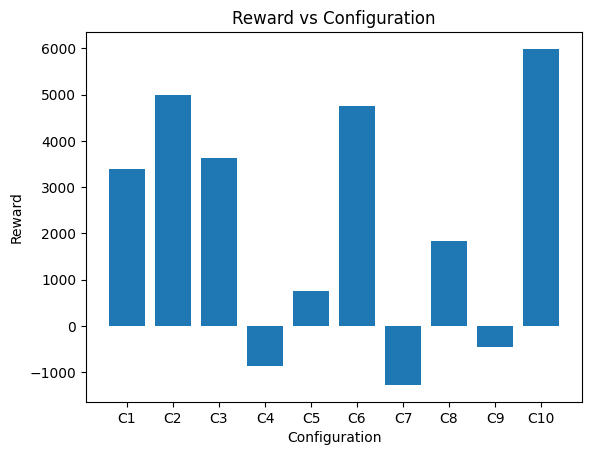

In [2]:
#extracting rewards from log file
data_paths = [f"pyperbot_v2/logs/harry_results/trial_{i}" for i in range(1, 11)]
data_path_10 = "pyperbot_v2/logs/harry_results/trial_10/trial10.csv"
#get value from trial 10
df = pd.read_csv(data_path_10)
rewards = df['value'].values
print(rewards)
#plot rewards vs config
config_list = [f'C{i}' for i in range(1, 11)]
plt.bar(config_list, rewards)
plt.xlabel('Configuration')
plt.ylabel('Reward')
plt.title('Reward vs Configuration')
plt.savefig('pyperbot_v2/logs/harry_results/reward_vs_config.png')

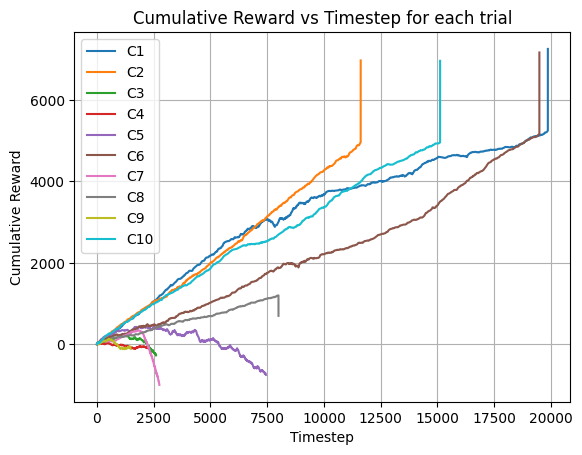

In [3]:
#Sampled trials and epsiodes from each config
#take episode 20 from each trial and plot cumulative reward
cum_rewards = []
for i in range(1, 11):
    data_path = f"pyperbot_v2/logs/harry_results/trial_{i}/episode_50.csv"
    df = pd.read_csv(data_path)
    cum_rewards.append(df.iloc[:,3].tolist())

#plot cum rewards against timestep for each episode
plt.figure()
for i in range(10):
    plt.plot(cum_rewards[i])
plt.xlabel('Timestep')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Timestep for each trial')
plt.grid()
plt.legend(config_list)
plt.savefig('pyperbot_v2/logs/harry_results/cum_reward_vs_timestep.png')


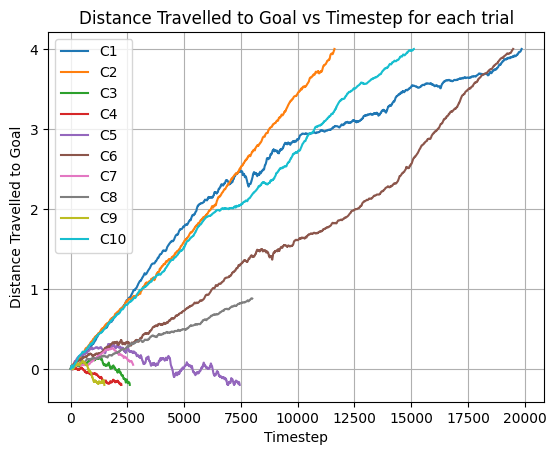

In [6]:
#Sampled trials and epsiodes from each config
#take episode 20 from each trial and plot cumulative reward
dist = []
for i in range(1, 11):
    data_path = f"pyperbot_v2/logs/harry_results/trial_{i}/episode_50.csv"
    df = pd.read_csv(data_path)
    dist.append(df.iloc[:,4].tolist())
#plot cum rewards against timestep for each episode
plt.figure()
for i in range(10):
    plt.plot(dist[i])
plt.xlabel('Timestep')
plt.ylabel('Distance Travelled to Goal')
plt.title('Distance Travelled to Goal vs Timestep for each trial')
plt.grid()
plt.legend(config_list)
plt.savefig('pyperbot_v2/logs/harry_results/distance_vs_timestep.png')


In [17]:
rewards = []
for i in range(1, 11):
    reward_list =[]
    with open(f'pyperbot_v2/logs/harry_results/trial_{i}/monitor.csv', 'r') as f:
        for line in f:
            temp_reward = line.split(',')[0]
            reward_list.append(temp_reward)
    rewards.append(reward_list)
    rewards = [float(r) for r in rewards[2:]] 


print(rewards)

# Plot rewards against episode for each configuration
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Reward vs Episode for each trial')

for i in range(1, 11):
    row = (i - 1) // 5
    col = (i - 1) % 5
    axs[row, col].plot(rewards[i-1])
    axs[row, col].set_xlabel('Episode')
    axs[row, col].set_ylabel('Reward')
    axs[row, col].set_title(f'Trial {i}')
    axs[row, col].grid()

plt.tight_layout()
plt.savefig('pyperbot_v2/logs/harry_results/reward_vs_episode.png')
plt.show()

ValueError: could not convert string to float: '#{"t_start": 1713357574.2246778'

In [5]:
#generating correlation scores for each config hyperparameter

#extracting hyperparameters
hyperparams = []
data_path = "pyperbot_v2/logs/hyperparam_test2/trial_10/trial10.csv"
df = pd.read_csv(data_path)
for i in range(1, 11):
    hyperparams.append(df[f'param_{i}'].values)

KeyError: 'param_1'